<a href="https://colab.research.google.com/github/nishi1612/CS306-Data-Analysis-and-Visualization/blob/master/201601408_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab import files
from scipy import stats

**Question 4**

In [0]:
men = [9 , 11 , 22 , 12 , 18 , 32 , 23 , 20 , 49 , 6]
women = [7 , 41 , 8 , 19 , 21 , 23 , 35 , 27 , 13 , 5]

In [0]:
def calculate_deviation(x):
  mean_x = sum(x)/len(x)
  t = [(i-mean_x)**2 for i in x]
  return sum(t)

In [0]:
def calculate_sp(men,women):
  a = calculate_deviation(men)
  b = calculate_deviation(women)
  sp_square = (a+b)/(len(men) -1 + len(women) - 1)
  sp = math.sqrt(sp_square)
  return sp

In [0]:
calculate_sp(men,women)

12.419742348374221

In [0]:
def calculate_confidence_interval(men,women,t):
  sp = calculate_sp(men,women)
  a = sum(men)/len(men) - sum(women)/len(women) - t*sp*math.sqrt(1/len(men) + 1/len(women))
  b = sum(men)/len(men) - sum(women)/len(women) + t*sp*math.sqrt(1/len(men) + 1/len(women))
  return [a,b]

In [0]:
calculate_confidence_interval(men,women,2.101)

[-11.369537302309805, 11.969537302309806]

In [0]:
calculate_confidence_interval(men,women,2.878)

[-15.685211021441036, 16.285211021441036]

**Question 5**



In [0]:
mu = 50
sigma = 10
np.random.seed(10)
a = np.random.normal(mu, sigma, 5)
b = np.random.normal(mu, sigma, 5)
c = np.random.normal(mu, sigma, 5)
mean_a = np.mean(a)
mean_b = np.mean(b)
mean_c = np.mean(c)
grand_mean = (mean_a + mean_b + mean_c) / 3
SSB = 5*((mean_a - grand_mean)**2 + (mean_b - grand_mean)**2 + (mean_c - grand_mean)**2)
SSE = calculate_deviation(a) + calculate_deviation(b) + calculate_deviation(c)
MSB = SSB/2
MSE = SSE/12
F = MSB/MSE
mean_a, mean_b, mean_c, grand_mean, SSB, SSE, MSB, MSE, F

(52.22883462075722,
 48.96733154205857,
 53.85580420271282,
 51.68399012184287,
 61.969328844889375,
 832.1158392908135,
 30.984664422444688,
 69.3429866075678,
 0.44683198602038804)

In [0]:
a,b,c

(array([63.31586504, 57.15278974, 34.54599708, 49.9161615 , 56.21335974]),
 array([42.79914439, 52.65511586, 51.08548526, 50.04291431, 48.25399789]),
 array([54.3302619 , 62.03037374, 40.34934329, 60.28274078, 52.2863013 ]))

In [0]:
mu = 50
sigma = 10
f_values = []
np.random.seed(10)
for i in range(200):
  a = np.random.normal(mu, sigma, 5)
  b = np.random.normal(mu, sigma, 5)
  c = np.random.normal(mu, sigma, 5)
  mean_a = np.mean(a)
  mean_b = np.mean(b)
  mean_c = np.mean(c)
  grand_mean = (mean_a + mean_b + mean_c) / 3
  SSB = 5*((mean_a - grand_mean)**2 + (mean_b - grand_mean)**2 + (mean_c - grand_mean)**2)
  SSE = calculate_deviation(a) + calculate_deviation(b) + calculate_deviation(c)
  MSB = SSB/2
  MSE = SSE/12
  F = MSB/MSE
  f_values.append(F)

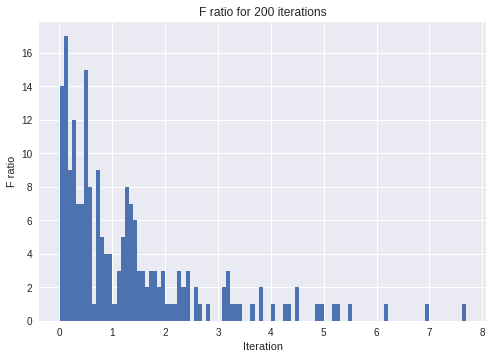

In [0]:
plt.hist(f_values,bins=100)
plt.title('F ratio for 200 iterations')
plt.xlabel('Iteration')
plt.ylabel('F ratio')
plt.show()

In [0]:
count = 0
for f in f_values:
  if(f>3.89):
    count=count+1
print(count/len(f_values))

0.065


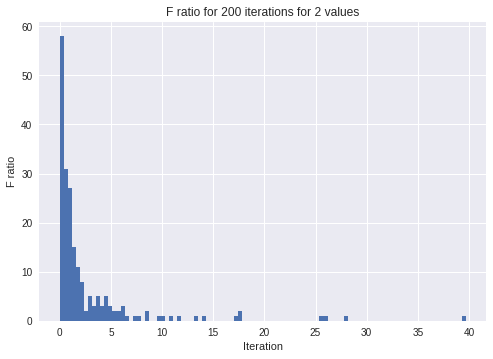

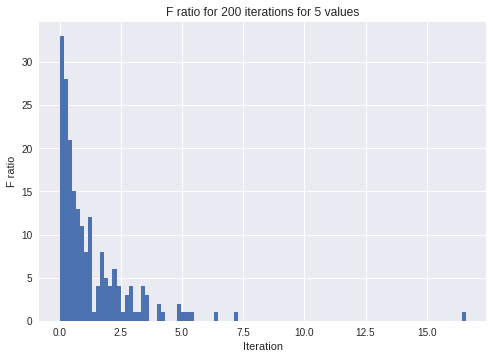

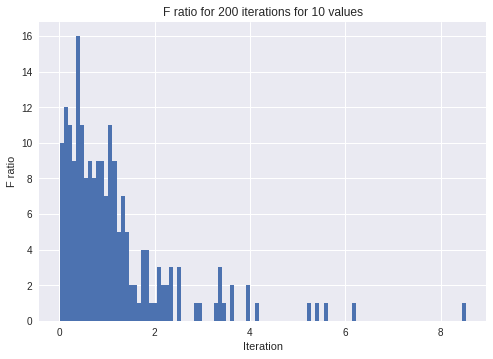

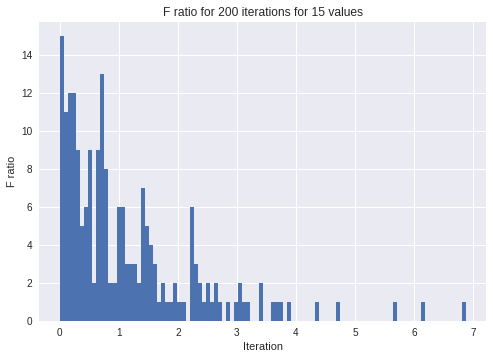

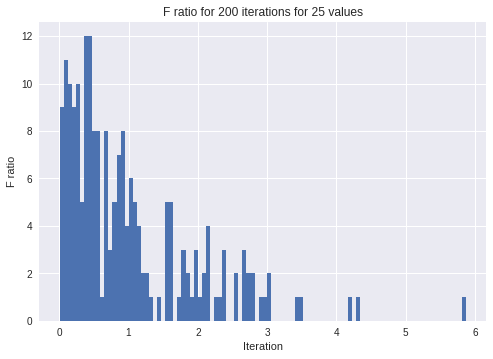

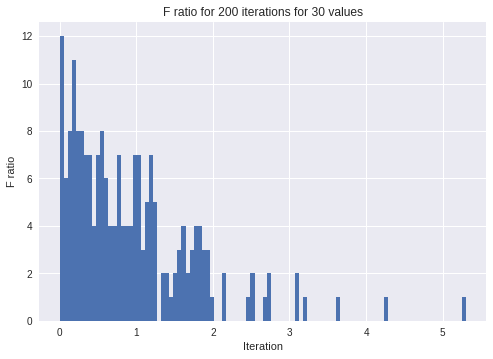

In [0]:
mu = 50
sigma = 10
count_vals = []
mu = 50
sigma = 10
vals = [2,5,10,15,25,30]
np.random.seed(8)
for i in vals:
  f_values = []
  for j in range(201):
    a = np.random.normal(mu, sigma, i)
    b = np.random.normal(mu, sigma, i)
    c = np.random.normal(mu, sigma, i)
    mean_a = np.mean(a)
    mean_b = np.mean(b)
    mean_c = np.mean(c)
    grand_mean = (mean_a + mean_b + mean_c) / 3
    SSB = i*((mean_a - grand_mean)**2 + (mean_b - grand_mean)**2 + (mean_c - grand_mean)**2)
    SSE = calculate_deviation(a) + calculate_deviation(b) + calculate_deviation(c)
    MSB = SSB/2
    MSE = SSE/(3*i - 3)
    F = MSB/MSE
    f_values.append(F)
  count = 0
  for f in f_values:
    if(f>=3.89):
      count=count+1
  count_vals.append(count/len(f_values))
  plt.hist(f_values,bins=100)
  plt.title('F ratio for 200 iterations for ' + str(i) + ' values')
  plt.xlabel('Iteration')
  plt.ylabel('F ratio')
  plt.show()

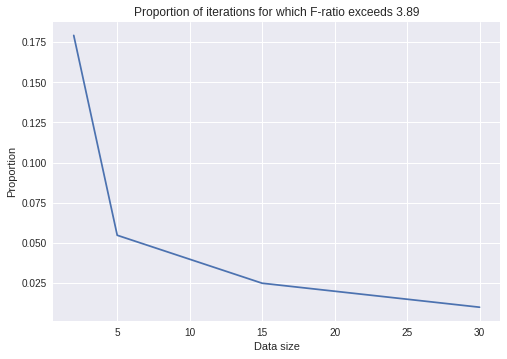

In [0]:
plt.plot(vals,count_vals)
plt.title('Proportion of iterations for which F-ratio exceeds 3.89')
plt.xlabel('Data size')
plt.ylabel('Proportion')
plt.show()

**Question 6**

In [0]:
uploaded = files.upload()

Saving data-ass1.csv to data-ass1.csv
Saving data2-ass1.csv to data2-ass1.csv


In [0]:
data = io.BytesIO(uploaded['data-ass1.csv']) 
df = pd.read_csv(data)

In [0]:
x = df["x"].values

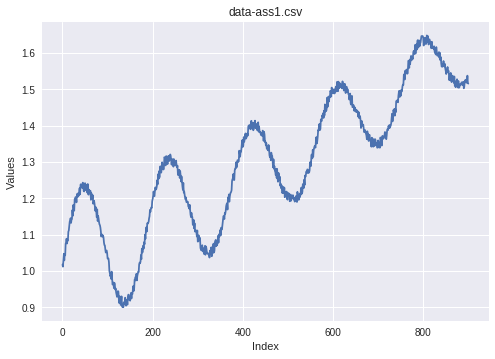

In [0]:
plt.plot(x)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('data-ass1.csv')
plt.show()

In [0]:
beta_0 = 1.02044437590671
beta_1 = 0.000615598179149
index = np.arange(1,len(x)+1,1)
x_predicted =  beta_0 + beta_1 * index

In [0]:
x = x - x_predicted

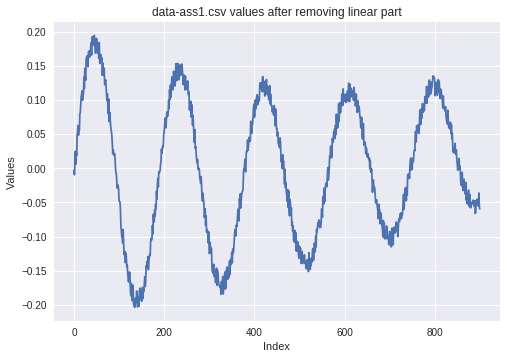

In [0]:
plt.plot(x)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('data-ass1.csv values after removing linear part')
plt.show()

In [0]:
def calculate_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

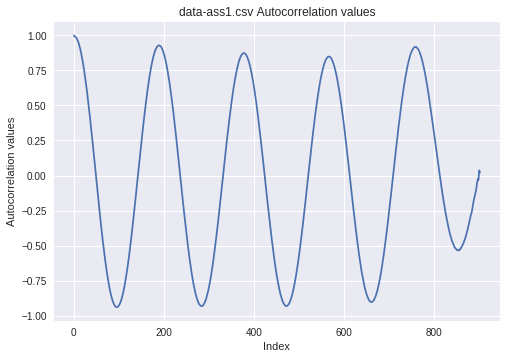

In [0]:
y = calculate_autocorrelation(x)
plt.plot(index,y)
plt.xlabel('Index')
plt.ylabel('Autocorrelation values')
plt.title('data-ass1.csv Autocorrelation values')
plt.show()

In [0]:
def find_peak_indexes(x):
  y = max(x)
  print(y)
  pindex = []
  pindex.append(0)
  for i in range(1,len(x)-1):
    if(x[i-1]<x[i] and x[i+1]<x[i]):
      pindex.append(i)
  return pindex

In [0]:
pindex = find_peak_indexes(y)
pindex

1.0


[0, 188, 377, 565, 755, 758, 851, 896, 899]

In [0]:
def find_periodicity(x):
  ans = []
  for i in range(1,len(x)):
    ans.append(x[i] - x[i-1])
  return ans

In [0]:
periods = find_periodicity(pindex)
periods

[188, 189, 188, 190, 3, 93, 45, 3]

In [0]:
data = io.BytesIO(uploaded['data2-ass1.csv']) 
f = pd.read_csv(data)

In [0]:
x = f["x"].values

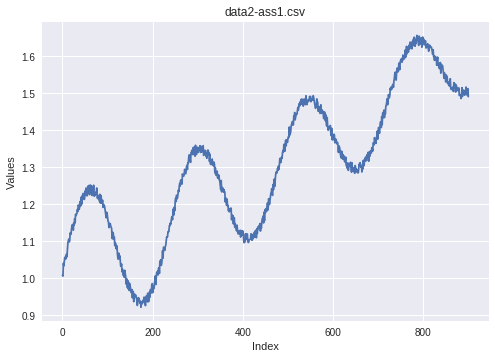

In [0]:
plt.plot(x)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('data2-ass1.csv')
plt.show()

In [0]:
beta_1 = 0.000607477382241
beat_0 = 1.0276384795235
index = np.arange(1,len(x)+1,1)
x_predicted =  beta_0 + beta_1 * index

In [0]:
x = x - x_predicted

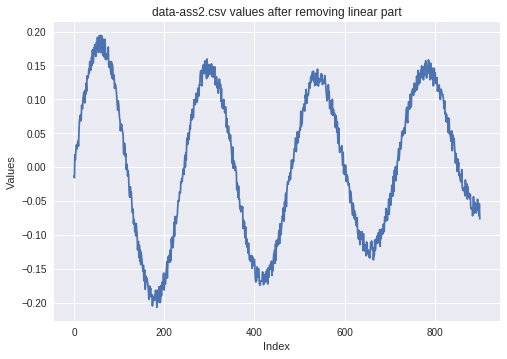

In [0]:
plt.plot(x)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('data-ass2.csv values after removing linear part')
plt.show()

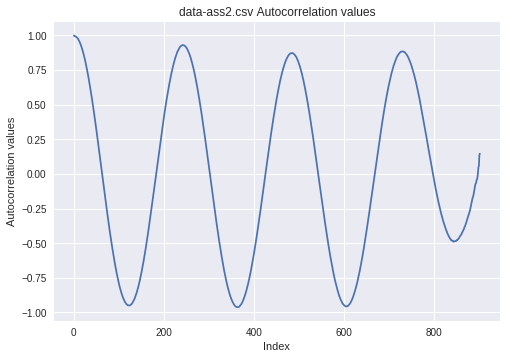

In [0]:
y = calculate_autocorrelation(x)
plt.plot(index,y)
plt.xlabel('Index')
plt.ylabel('Autocorrelation values')
plt.title('data-ass2.csv Autocorrelation values')
plt.show()

In [0]:
pindex = find_peak_indexes(y)
pindex

1.0000000000000002


[0, 2, 241, 483, 729, 838, 842]

In [0]:
periods = find_periodicity(pindex)
periods

[2, 239, 242, 246, 109, 4]